In [273]:
import pandas as pd
import seaborn as sns
!pip install seaborn
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\anasa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Parte 3 – Refined

Análise dos Autores

In [274]:
df_refined_autores = pd.read_csv('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/data/trusted/autores_susp_fant.csv', sep=',', quotechar='"', low_memory=False)

In [275]:
# Agregar a base por autor
df_refined_autores_a = df_refined_autores.groupby('autor').apply(
    lambda x: pd.Series({
        'qtd_livros': x['titulo'].count(),
        'total_avaliacoes': x['total_avaliacoes'].sum(),
        'media_avaliacao': (x['media_avaliacao'] * x['total_avaliacoes']).sum() / x['total_avaliacoes'].sum()
    })
).reset_index()


# Renomear para clareza
df_refined_autores_a.rename(columns={'titulo': 'qtd_livros'}, inplace=True)

C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\379037525.py:6: RuntimeWarning: invalid value encountered in scalar divide
  'media_avaliacao': (x['media_avaliacao'] * x['total_avaliacoes']).sum() / x['total_avaliacoes'].sum()
C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\379037525.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_refined_autores_a = df_refined_autores.groupby('autor').apply(


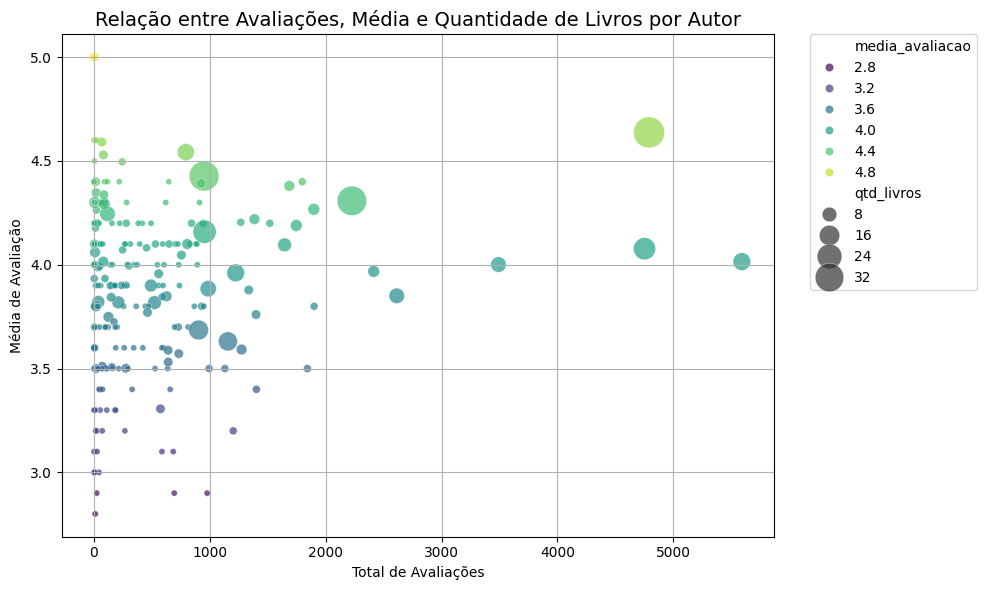

In [276]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df_refined_autores_a, 
    x="total_avaliacoes",
    y="media_avaliacao", 
    size="qtd_livros",            
    hue="media_avaliacao",      
    palette="viridis",           
    sizes=(20, 500),              
    alpha=0.7         
)

plt.title("Relação entre Avaliações, Média e Quantidade de Livros por Autor", fontsize=14)
plt.xlabel("Total de Avaliações")
plt.ylabel("Média de Avaliação")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.tight_layout()

# Salva o gráfico em um arquivo
plt.savefig('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/img/grafico_corr_autores.png')

plt.show()

Discrepâncias Livro a Livro

Objetivo: Encontrar livros desalinhados — muito populares e mal avaliados (ou o contrário).

In [277]:
# Agregar a base por autor
df_refined_autores_dis = df_refined_autores.groupby(['autor','titulo']).apply(
    lambda x: pd.Series({
        'qtd_livros': x['titulo'].count(),
        'total_avaliacoes': x['total_avaliacoes'].sum(),
        'media_avaliacao': (x['media_avaliacao'] * x['total_avaliacoes']).sum() / x['total_avaliacoes'].sum()
    })
).reset_index()


# Renomear para clareza
df_refined_autores_dis.rename(columns={'titulo': 'qtd_livros'}, inplace=True)

C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\1293810627.py:6: RuntimeWarning: invalid value encountered in scalar divide
  'media_avaliacao': (x['media_avaliacao'] * x['total_avaliacoes']).sum() / x['total_avaliacoes'].sum()
C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\1293810627.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_refined_autores_dis = df_refined_autores.groupby(['autor','titulo']).apply(


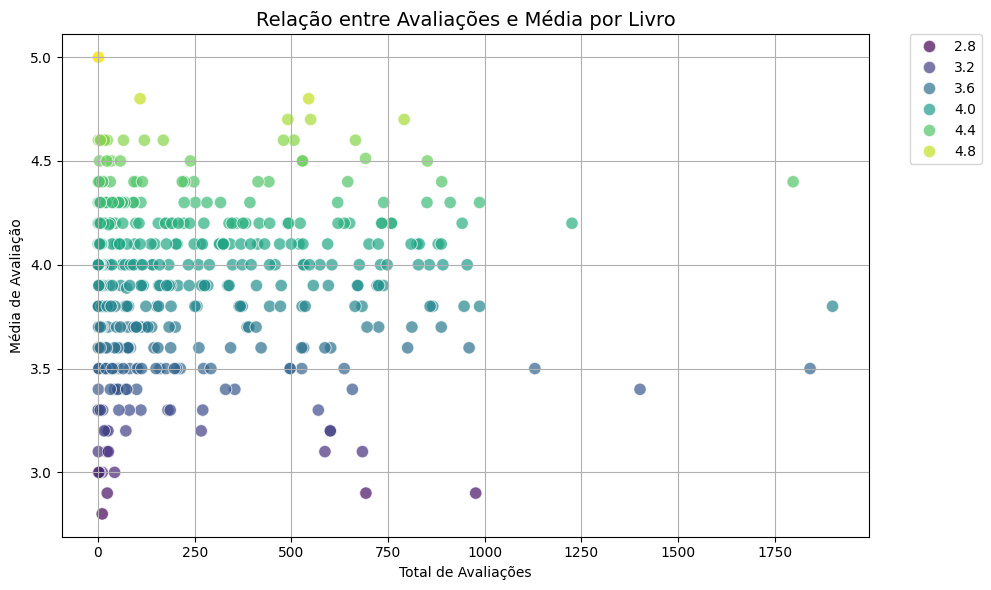

In [278]:
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=df_refined_autores_dis, 
    x="total_avaliacoes",
    y="media_avaliacao", 
    hue="media_avaliacao",
    palette="viridis",          
    alpha=0.7,
    s=80                       
)

plt.title("Relação entre Avaliações e Média por Livro", fontsize=14)
plt.xlabel("Total de Avaliações")
plt.ylabel("Média de Avaliação")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.tight_layout()

# Salva o gráfico em um arquivo
plt.savefig('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/img/grafico_corr_livros.png')

plt.show()

Oportunidades (Jóias Escondidas)

Objetivo: Encontrar livros de alta qualidade e baixa visibilidade.

In [279]:
popular_alta = 50
lim_qualidade = 4.5

df_refined_livros_rank_a = df_refined_autores[
    (df_refined_autores["total_avaliacoes"] <= popular_alta) &
    (df_refined_autores["media_avaliacao"] >= lim_qualidade)
]

df_refined_livros_top = pd.df_refined_livros_top = df_refined_livros_rank_a.sort_values(by="media_avaliacao", ascending=False).head(5)

C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\2962357939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


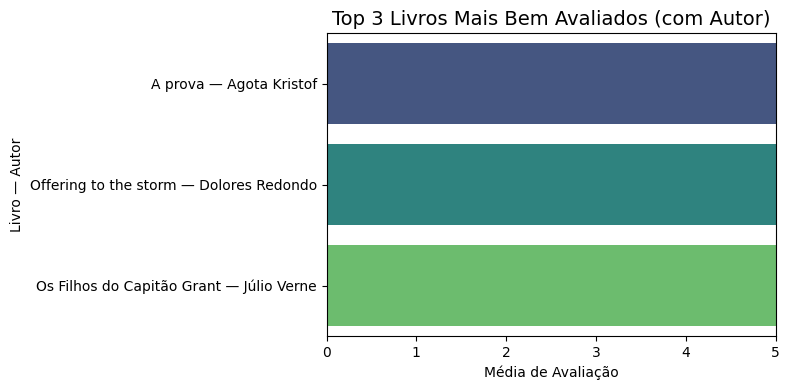

In [280]:
# Cria coluna combinada
df_refined_livros_top["livro_autor"] = df_refined_livros_top["titulo"] + " — " + df_refined_livros_top["autor"]

# Plota o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_refined_livros_top,
    x="media_avaliacao",
    y="livro_autor",
    palette="viridis"
)

plt.title("Top 3 Livros Mais Bem Avaliados (com Autor)", fontsize=14)
plt.xlabel("Média de Avaliação")
plt.ylabel("Livro — Autor")
plt.xlim(0, 5)
plt.tight_layout()

# Salva o gráfico em um arquivo
plt.savefig('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/img/grafico_rank_top.png')

plt.show()

Objetivo: Encontrar livros de baixa qualidade e alta visibilidade.

In [281]:
popular_alta = 50
lim_qualidade = 4.5

df_refined_livros_rank_b = df_refined_autores[
    (df_refined_autores["total_avaliacoes"] >= popular_alta) &
    (df_refined_autores["media_avaliacao"] <= lim_qualidade)
]

df_refined_livros_down = pd.df_refined_livros_down = df_refined_livros_rank_b.sort_values(by="media_avaliacao", ascending=False).head(5)

C:\Users\anasa\AppData\Local\Temp\ipykernel_18452\1217141614.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


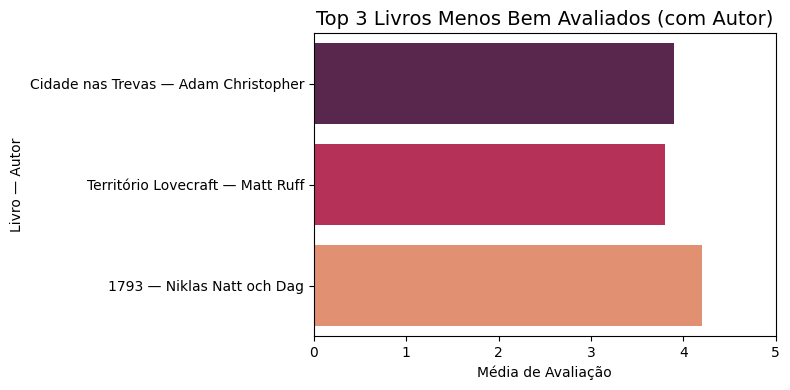

In [282]:
# Cria coluna combinada
df_refined_livros_rank_down["livro_autor"] = df_refined_livros_rank_down["titulo"] + " — " + df_refined_livros_rank_down["autor"]

# Plota o gráfico
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df_refined_livros_rank_down,
    x="media_avaliacao",
    y="livro_autor",
    palette="rocket"
)

plt.title("Top 3 Livros Menos Bem Avaliados (com Autor)", fontsize=14)
plt.xlabel("Média de Avaliação")
plt.ylabel("Livro — Autor")
plt.xlim(0, 5)
plt.tight_layout()

# Salva o gráfico em um arquivo
plt.savefig('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/img/grafico_rank_down.png')

plt.show()


Análise dos Leitores

In [283]:
df_refined_leitores = pd.read_csv('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/data/trusted/leitores_susp_fant.csv', sep=',', quotechar='"', low_memory=False)

Carregamento

In [284]:
#dataset de livros de suspense e fantasia
df_refined_autores_a.to_csv('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/data/refined/autores_susp_fant_agr.csv', index=False)
df_refined_livros_rank.to_csv('C:/Users/anasa/OneDrive/Documentos/DT/pipeline_livros/data/refined/rank_livros.csv', index=False)